# Use of resample and flipsp functions

Spectral data are often delivered with decreasing and non-regularly sampled frequencies. This notebook shows how rampy can help you to solve this problem.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import rampy as rp

# Creating a fake signal, with decreasing frequencies and irregularly sampled

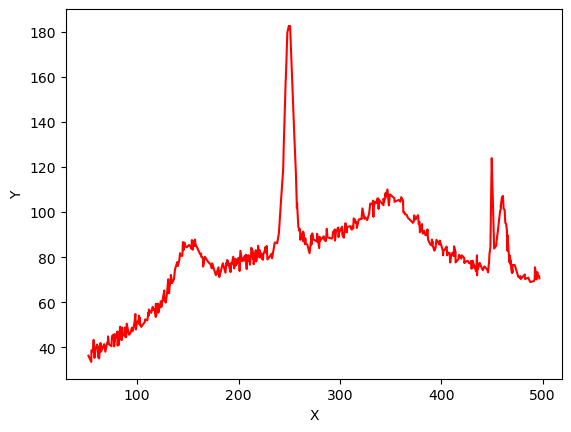

In [2]:
nb_points  =500
x = np.sort(np.random.uniform(50,500,nb_points))[::-1]

# gaussian peaks
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large gaussian + linear 
bkg = 60.0 * np.exp(-np.log(2) * ((x-250.0)/200.0)**2) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
y = p1 + p2 + p3 + p4 + p5 + noise +bkg

# spectrum, recorded array
spectrum = np.vstack((x,y)).T

plt.plot(spectrum[:,0],spectrum[:,1],"r-")
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

OK, makes no difference for pyplot but actually x is reversely sorted, and no regularly sampled

In [3]:
print(spectrum[0:10,0])

[496.75190735 496.49673359 495.33255045 494.74723706 493.96727396
 492.46582855 492.12042674 491.38927359 487.73561541 486.25856412]


In [4]:
print("interval 1:"+str(spectrum[1,0]-spectrum[0,0]))
print("interval 2:"+str(spectrum[2,0]-spectrum[1,0]))

interval 1:-0.25517375893275585
interval 2:-1.1641831428323712


We can solve the first problem by using rp.resample(). Note that we could also use numpy.interp(). We will compare both for the sack of example. We first flip the array, then resample it.

In [5]:
spectrum_increasing = rp.flipsp(spectrum)
print(spectrum_increasing[0:10,0])

[51.99197153 54.80189297 54.91199931 56.7973227  57.13971864 57.15126224
 58.03351567 58.90509729 60.51883541 60.84486579]


OK, now the frequencies are in increasing order. This seems not important maybe, but remember than many spline algorithm (including gcvspline or the Dierckx version in scipy) required increasing x values...

Now, we resample on a linearly spaced x axis. When creating x_new, remember that the boundaries should be inside those of the existing frequencies.

In [6]:
x_new = np.arange(round(spectrum_increasing[0,0])+1,round(spectrum_increasing[-1,0])-1,0.8)
y_new_rp = rp.resample(spectrum_increasing[:,0],spectrum_increasing[:,1],x_new)
y_new_np = np.interp(x_new,spectrum_increasing[:,0],spectrum_increasing[:,1])

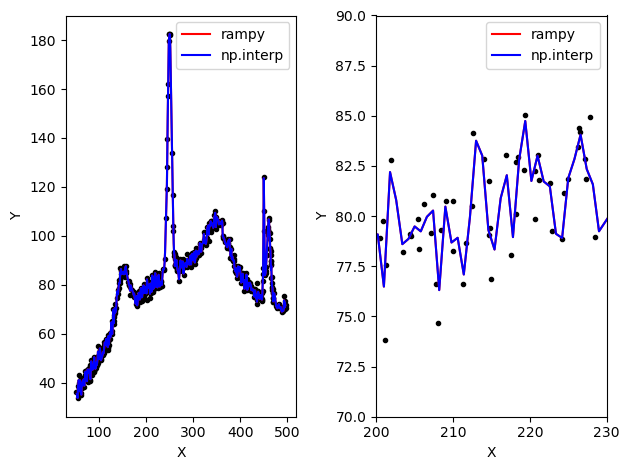

In [7]:
plt.subplot(1,2,1)
plt.plot(spectrum[:,0],spectrum[:,1],"k.")
plt.plot(x_new,y_new_rp,"r-",label="rampy")
plt.plot(x_new,y_new_np,"b-",label="np.interp")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.subplot(1,2,2)
plt.plot(spectrum[:,0],spectrum[:,1],"k.")
plt.plot(x_new,y_new_rp,"r-",label="rampy")
plt.plot(x_new,y_new_np,"b-",label="np.interp")
plt.ylabel("Y")
plt.xlabel("X")
plt.xlim(200,230)
plt.ylim(70,90)
plt.legend()
plt.tight_layout()

As seen below, `rampy.resample` return the same values as `numpy.interp` with the default values. However, we see that the fit is actually not really perfect. This is where `rampy.resample` offers you more: you can choose the type of interpolation done, and other options, as it uses `scipy.interpolate.interp1d` at the low level. See the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).

We can try to use a different algorithm and see the result:

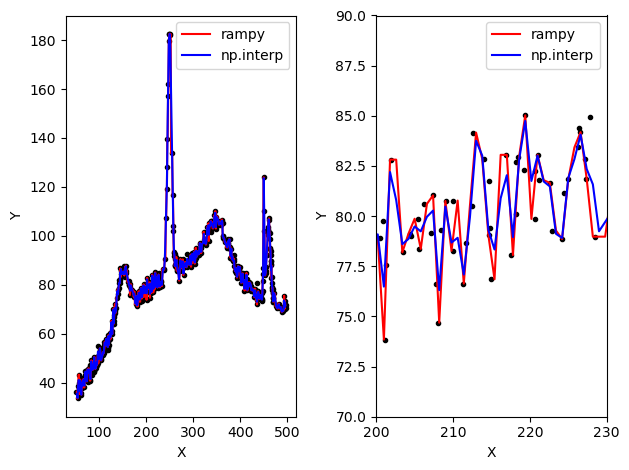

In [8]:
y_new_rp = rp.resample(spectrum_increasing[:,0],spectrum_increasing[:,1],x_new,kind="nearest")
plt.subplot(1,2,1)
plt.plot(spectrum[:,0],spectrum[:,1],"k.")
plt.plot(x_new,y_new_rp,"r-",label="rampy")
plt.plot(x_new,y_new_np,"b-",label="np.interp")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.subplot(1,2,2)
plt.plot(spectrum[:,0],spectrum[:,1],"k.")
plt.plot(x_new,y_new_rp,"r-",label="rampy")
plt.plot(x_new,y_new_np,"b-",label="np.interp")
plt.ylabel("Y")
plt.xlabel("X")
plt.xlim(200,230)
plt.ylim(70,90)
plt.legend()
plt.tight_layout()